# Baseline Model: Dummy Classifier

### Importing Libraries

In [39]:
import _pickle as pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier

### Loading in Data

In [20]:
with open("final_df.pickle",'rb') as fp:
    final_df = pickle.load(fp)

### Splitting the Data

In [21]:
# Assigning appropriate variables for modeling
X = final_df.drop('price_will_increase?', axis=1)
y = final_df['price_will_increase?']

# Splitting the data 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### Function to print out metrics

In [22]:
def print_metrics(test, preds):
    print("Precision Score: {}".format(precision_score(test, preds)))
    print("Recall Score: {}".format(recall_score(test, preds)))
    print("Accuracy Score: {}".format(accuracy_score(test, preds)))
    print("F1 Score: {}".format(f1_score(test, preds)))

#### Function for plotting confusion matrix

In [150]:
def plot_confusion_matrix(y_true, y_pred, labels=[False, 'Price up > 5%'], 
                          normalize=False, title=None, cmap=plt.cm.cividis):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="crimson" if cm[i, j] > thresh else "black",
                    size=26)
    fig.tight_layout()
    return ax

### Creating the baseline metrics to beat

In [24]:
# Fitting and training the dummy
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)

# Dummy predictions
dum_pred = dummy.predict(X_test)

#Printing out results
print_metrics(y_test, dum_pred)

Precision Score: 0.47674418604651164
Recall Score: 0.45054945054945056
Accuracy Score: 0.46629213483146065
F1 Score: 0.4632768361581921


These scores must be beaten to prove an overall effectiveness of a model.

### Confusion Matrix

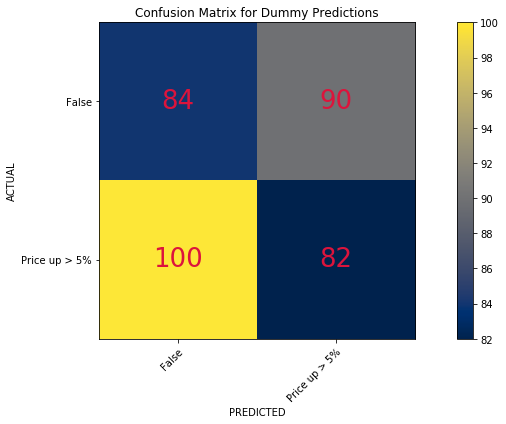

In [151]:
plot_confusion_matrix(y_test, dum_pred, title="Confusion Matrix for Dummy Predictions")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.savefig('DummyConMat.png')
plt.show()

In [149]:
# Double checking counts so that labels are indeed correct

# Count of Test
print(y_test.value_counts())
# Count of Predictions
print(np.unique(dum_pred, return_counts=True))

True     182
False    174
Name: price_will_increase?, dtype: int64
(array([False,  True]), array([184, 172]))


In [60]:
# Confusion Matrix
print("Confusion Matrix \n-----------------")
pd.crosstab(y_test, dum_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Confusion Matrix 
-----------------


Predicted,False,True,All
Actual,,,
False,84,90,174
True,100,82,182
All,184,172,356


##### Matrix must be beaten in order for the model to be better than randomly guessing